In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic_toy.csv')

In [3]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [5]:
df.isnull().sum()
df.isnull().mean()*100


,0
Age,19.865320
Fare,5.050505
Family,0.000000
Survived,0.000000


In [6]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [7]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train,y_test = train_test_split(x ,y ,random_state=2,test_size=0.2)
x_train.shape , x_test.shape            # 20% goes intestingsetand 80%train

((712, 3), (179, 3))

In [8]:
x_train.isnull().mean()*100

,0
Age,20.786517
Fare,5.056180
Family,0.000000


In [9]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()
median_fare

14.4583

In [10]:
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)
x_train['Age_median'] = x_train['Age'].fillna(median_age)

x_train['Fare_mean'] = x_train['Fare'].fillna(mean_fare)
x_train['Fare_median'] = x_train['Fare'].fillna(median_fare)


In [11]:
x_train.sample(6)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
124,54.0,77.2875,1,54.000000,54.00,77.287500,77.2875
174,56.0,30.6958,0,56.000000,56.00,30.695800,30.6958
474,22.0,9.8375,0,22.000000,22.00,9.837500,9.8375
378,20.0,NaN,0,20.000000,20.00,32.617597,14.4583
780,13.0,7.2292,0,13.000000,13.00,7.229200,7.2292
598,NaN,7.2250,0,29.785904,28.75,7.225000,7.2250


In [12]:
# variance is measure of howspreadout the values are - it tells howfar each no.isfrom
# average /mean
print('original age_variable variance : -' , x_train['Age'].var())

print('Age variance after mean imputation  : -' , x_train['Age_mean'].var())
print('Age variance after meadian imputation : -' , x_train['Age_median'].var())

original age_variable variance : - 204.3495133904614
Age variance after mean imputation  : - 161.81262452718673
Age variance after meadian imputation : - 161.9895663346054


In [13]:
print('original fare_variable variance : -' , x_train['Fare'].var())

print('Fare variance after mean imputation  : -' , x_train['Fare_mean'].var())
print('Fare variance after meadian imputation : -' , x_train['Fare_median'].var())

original fare_variable variance : - 2448.197913706318
Fare variance after mean imputation  : - 2324.2385256705547
Fare variance after meadian imputation : - 2340.0910219753637


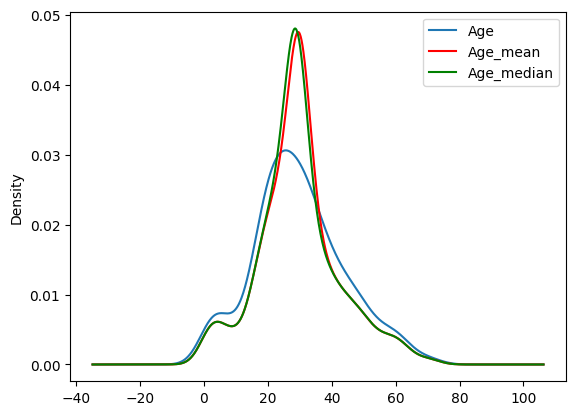

In [14]:
# Distribution changes
import matplotlib.pyplot as plt
figu = plt.figure()
axis  = figu.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde' , ax=axis)

# variable imputed with mean
x_train['Age_mean'].plot(kind='kde',ax=axis,color='red')

# variable imputed with median
x_train['Age_median'].plot(kind='kde',ax=axis,color='green')

#added the legends
lines, labels = axis.get_legend_handles_labels()
axis.legend(lines, labels, loc='best')

# the_diff is large due to more missing_valuesi.e 20%

In [15]:
# original variable distribution
x_train['Age'].plot(kind='kde' , ax=axis)

# variable imputed with mean
x_train['Age_mean'].plot(kind='kde',ax=axis,color='red')

# variable imputed with median
x_train['Age_median'].plot(kind='kde',ax=axis,color='green')

<Axes: ylabel='Density'>

In [16]:
lines, labels = axis.get_legend_handles_labels()
axis.legend(lines, labels, loc='best')

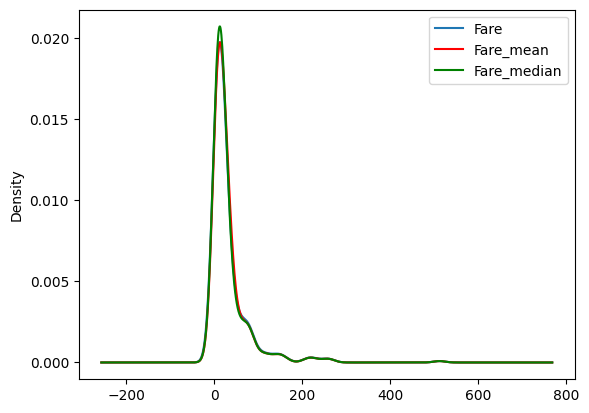

In [17]:
# Distribution changes
import matplotlib.pyplot as plt
figu = plt.figure()
axis  = figu.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde' , ax=axis)

# variable imputed with mean
x_train['Fare_mean'].plot(kind='kde',ax=axis,color='red')

# variable imputed with median
x_train['Fare_median'].plot(kind='kde',ax=axis,color='green')

#added the legends
lines, labels = axis.get_legend_handles_labels()
axis.legend(lines, labels, loc='best')

# the_diff is negligible perfectly overlapping over each other all3

In [18]:
x_train.cov()
# Covariance matrix of numerical columns - tells you how two features change together

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
Fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


In [19]:
x_train.corr()          # measures the strength and direction of a linear relationship between two variables


,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
Age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
Age_median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
Fare_mean,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
Fare_median,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


USING SKLEARN

In [20]:
x_train ,x_test ,y_train,y_test = train_test_split(x ,y ,random_state=2,test_size=0.2)
x_train.shape , x_test.shape

((712, 3), (179, 3))

In [21]:
from sklearn.impute import SimpleImputer

imp1 = SimpleImputer(strategy='mean')
imp2 = SimpleImputer(strategy='median')

In [22]:
from sklearn.compose import ColumnTransformer

trnsf = ColumnTransformer([

    ( 'Imputer1', imp1 , ['Age'] ) ,
    ( 'Imputer2' , imp2 , ['Fare'] )

] , remainder='passthrough')            # remainder='drop'

# syntax of transformer
# ct = ColumnTransformer(
#     transformers=[
#         ('transformer_name1', transformer1(), [column1, column2, ...]),
#         ('transformer_name2', transformer2(), [column3, ...])
#     ],
#     remainder='drop'  # or 'passthrough'
# )

In [23]:
trnsf.fit(x_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('Imputer1', SimpleImputer(), ['Age']),
                                ('Imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [24]:
trnsf.named_transformers_['Imputer1'].statistics_

array([29.78590426])

In [25]:
trnsf.named_transformers_['Imputer2'].statistics_

array([14.4583])

In [26]:
x_train= trnsf.transform(x_train)
x_test =trnsf.transform(x_test)

In [27]:
x_train.shape

(712, 3)

In [28]:
x_test.shape

(179, 3)